In [1]:
import numpy as np
import scipy as sp
import matplotlib as mpl
from matplotlib import pyplot as plt
import sys
import glob, re
import pandas as pd
import os
import natsort
import pickle 
import colorsys

from celluloid import Camera
from IPython.display import HTML

from definitions import *

# Loading a LAMMPS simulation frame

In [124]:
# Path to folder where frames are located
path = '/home/active-galton/runs/production/7a.GB_ABP/sweep_taur/ts0.001_rt10000000_s1000_L2500_N20000_T0.001_Tr0.01402_gt1_gr3_f1_e0_Fp0.5_Fg2_LJc1.12246204831/Frames/'


In [23]:
# We can see the files contained in this folder with. 
# Each files is labeled 'Conf_Run.t' where 't' is the timestep of the simulation.
# Conf_Run.0 is the initial configuration in which all particles are in the same point.
os.listdir(path)

['msd.dat', 'Frames', 'vars.dat']

In [125]:
# We store the filenames contained in this folder in a python list
filenames = os.listdir(path)


In [126]:
# We sort the list with a natural sort order
filenames.sort(key=natural_sort_key)


In [127]:
# Join the path to the filename
filenames_paths = [path+f for f in filenames]


In [ ]:
# We load the some frames.
frames = load_frames(filenames_paths[::100])


In [ ]:
# The frame contains information of the particle such as particle id., type of particle, position, velocity, ...
# The "load_frames" function loads a frame using the trajectory class and stores it as a pandas dataframe.
# Each row corresponds to one particle
frames[11].traj


In [ ]:
# We can also access the timestep of this frame:
frames[11].step


In [ ]:
# And the size of the simulation box:
frames[11].boxX, frames[11].boxY, frames[11].boxZ


# Visualizing particle data

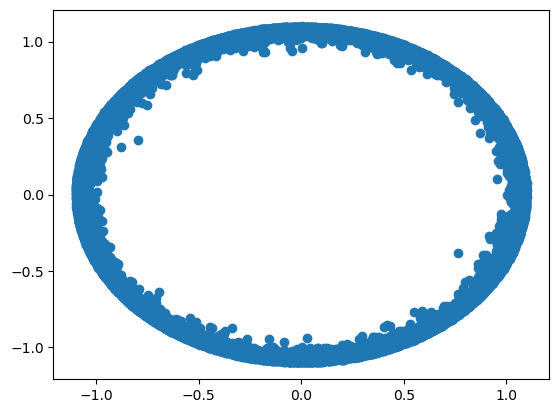

In [11]:
fig, ax = plt.subplots()
ax.scatter(frames[11].traj[["x"]], frames[11].traj[["y"]])

## Making animations

In [ ]:
fig, ax = plt.subplots();
dt=0.01
ax.set_xlabel(r'$x/\sqrt{\tau}$')
ax.set_ylabel(r'$y/\sqrt{\tau}$')
ax.set_xlim(-13,13);
ax.set_ylim(-13,13);

camera = Camera(fig);

for i,f in enumerate(frames[:]):
    
    pos = f.traj[['x','y']].values
    #ori = f.traj[['mux','muy']].values
    ori = f.traj[['vx','vy']].values

    radial_ori = np.round([list(colorsys.hsv_to_rgb((np.dot(o,p/np.linalg.norm(p))+1)/2,1,1)) for o,p in zip(ori,pos)])    

    #abs_max = np.ceil(np.max([pos.min()/np.sqrt(t+dt),pos.max()/np.sqrt(t+dt)])*10)/10
    #hi = 1.1*abs_max
    #lo = -1.1*abs_max
    
    clear_output(wait=True)
    t = dt*f.step
    ax.scatter(f.traj[["x"]]/np.sqrt(t), f.traj[["y"]]/np.sqrt(t), c=radial_ori, s=1, marker='.', alpha=0.25);
    ax.text(0.5, 1.01, r'$\tau = $'+f'{np.round(t,2)}', transform=ax.transAxes)    
    camera.snap();
    print(f'Completed: {np.round(100*i/len(frames),1)} %')

    
animation = camera.animate(interval=20);
HTML(animation.to_html5_video())

animation.save('/home/active-galton/results/2.ABP-RTP_bulk/ABP_animation_rescaled_color-velocity.mp4',dpi=500)

Completed: 100.0 %
